# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

import os
from tqdm import tqdm

import plotly as plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [12]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [13]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
%%time
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:56<00:00, 1920.67it/s]

Wall time: 56.9 s


In [16]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

In [17]:
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

In [18]:
project_data.drop(['project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4'], axis = 1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
title = decontracted(project_data['project_title'].values[6000])
print(title)

Building a Better Listener


In [20]:
title = title.replace('\\r', ' ')
title = title.replace('\\"', ' ')
title = title.replace('\\n', ' ')
print(title)

Building a Better Listener


In [21]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for titles in tqdm(project_data['project_title'].values):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    preprocessed_titles.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 76760.51it/s]


In [22]:
preprocessed_titles[6000]

'building a better listener'

In [23]:
project_data['clean_title'] = preprocessed_titles
project_data.drop(['project_title'], axis=1, inplace=True)

###### NULL IN TEACHER PREFIX

In [24]:
nulls = project_data.isnull().sum()
nulls[nulls > 0]

teacher_prefix    3
dtype: int64

In [25]:
project_data["teacher_prefix"].fillna(method='ffill', inplace=True)

In [26]:
project_data['teacher_prefix'].isnull().sum(axis = 0)

0

In [27]:
project_data["teacher_prefix"] = project_data["teacher_prefix"].str.replace(".","") #https://www.reddit.com/r/learnpython/comments/5ktuhv/how_do_i_remove_commas_from_data_frame_column/

In [28]:
project_data["teacher_prefix"] = project_data["teacher_prefix"].str.lower() # https://stackoverflow.com/questions/22245171/how-to-lowercase-a-pandas-dataframe-string-column-ifs-it-has-missing-value

In [29]:
project_data['school_state'] = project_data["school_state"].str.lower()

###### Merging two dataframes

In [30]:
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [31]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [32]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [33]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_essay,clean_title,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,mrs,ca,2016-04-27 00:27:36,Grades PreK-2,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,fortunate enough use fairy tale stem kits clas...,engineering steam into the primary classroom,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,ms,ut,2016-04-27 00:31:25,Grades 3-5,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,imagine 8 9 years old third grade classroom se...,sensory tools for focus,213.03,8


###### CLEAN GRADE CATEGORY

In [34]:
grade_cat = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_cat:
    temp = ""
    i=i.replace('-',' ') 
    temp +=i.strip()+" "
    grade_cat_list.append(temp.strip())

In [35]:
project_data['clean_grades'] = grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [36]:
project_data['clean_grades'] = project_data['clean_grades'].str.replace(' ', '_')
project_data['clean_grades'] = project_data["clean_grades"].str.lower()

In [37]:
project_data['clean_categories'] = project_data["clean_categories"].str.lower()

In [38]:
project_data['clean_subcategories'] = project_data["clean_subcategories"].str.lower()

In [39]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,clean_essay,clean_title,price,quantity,clean_grades
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,mrs,ca,2016-04-27 00:27:36,My students need STEM kits to learn critical s...,53,math_science,appliedsciences health_lifescience,fortunate enough use fairy tale stem kits clas...,engineering steam into the primary classroom,725.05,4,grades_prek_2


# Splitting Training, CV, Test data

In [40]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [41]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(49041, 15) (49041,)
(24155, 15) (24155,)
(36052, 15) (36052,)


In [42]:
from collections import Counter
print(Counter(y_train).items())
print(Counter(y_test).items())

dict_items([(1, 41615), (0, 7426)])
dict_items([(1, 30593), (0, 5459)])


## 1.5 Preparing data for models

###### VECTORIZATION OF CATEGORICAL DATA

In [43]:
X.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'clean_essay', 'clean_title', 'price',
       'quantity', 'clean_grades'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [44]:
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,clean_essay,clean_title,price,quantity,clean_grades
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,mrs,ca,2016-04-27 00:27:36,My students need STEM kits to learn critical s...,53,math_science,appliedsciences health_lifescience,fortunate enough use fairy tale stem kits clas...,engineering steam into the primary classroom,725.05,4,grades_prek_2


### 1.5.1 Vectorizing Categorical data

###### 1.5.1.1 Encoding Categorical Feature : School State

In [45]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


###### 1.5.1.2 Encoding Categorical Feature : teacher prefix

In [46]:
X['teacher_prefix'].isnull().sum(axis = 0)

0

In [47]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


###### 1.5.1.3 Encoding Categorical Feature : project_grade_category

In [48]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_grades'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['clean_grades'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['clean_grades'].values)
X_test_grade_ohe = vectorizer.transform(X_test['clean_grades'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


###### 1.5.1.4 Encoding Categorical Feature : clean_categories

In [49]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


###### 1.5.1.4 Encoding Categorical Feature : clean_subcategories

In [50]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_cat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_sub_cat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_cat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_cat_ohe.shape, y_train.shape)
print(X_cv_sub_cat_ohe.shape, y_cv.shape)
print(X_test_sub_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words for essays

In [51]:
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,clean_essay,clean_title,price,quantity,clean_grades
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,mrs,ca,2016-04-27 00:27:36,My students need STEM kits to learn critical s...,53,math_science,appliedsciences health_lifescience,fortunate enough use fairy tale stem kits clas...,engineering steam into the primary classroom,725.05,4,grades_prek_2


In [52]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['clean_essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(49041, 15) (49041,)
(24155, 15) (24155,)
(36052, 15) (36052,)
After vectorizations
(49041, 96552) (49041,)
(24155, 96552) (24155,)
(36052, 96552) (36052,)


#### 1.5.2.2Bag of words for titles

In [53]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['clean_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['clean_title'].values)
X_test_title_bow = vectorizer.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 4760) (49041,)
(24155, 4760) (24155,)
(36052, 4760) (36052,)


#### 1.5.2.2 TFIDF vectorizer for essays

In [54]:
%%time
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(49041, 15) (49041,)
(24155, 15) (24155,)
(36052, 15) (36052,)
After vectorizations
(49041, 96552) (49041,)
(24155, 96552) (24155,)
(36052, 96552) (36052,)
Wall time: 51.9 s


#### 1.5.2.2 TFIDF vectorizer for titles

In [55]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['clean_title'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['clean_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 4760) (49041,)
(24155, 4760) (24155,)
(36052, 4760) (36052,)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

##### Avg W2V on essays

##### Avg W2V on X_train essays

In [56]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [57]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_essays.append(vector)

print(len(avg_w2v_vectors_train_essays))
print(len(avg_w2v_vectors_train_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:14<00:00, 3445.98it/s]

49041
300


##### Avg W2V on X_cv essays

In [58]:

avg_w2v_vectors_cv_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_essays.append(vector)
print(len(avg_w2v_vectors_cv_essays))
print(len(avg_w2v_vectors_cv_essays[0]))


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:07<00:00, 3279.43it/s]

24155
300


##### Avg W2V on X_test essays

In [59]:
avg_w2v_vectors_test_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_essays.append(vector)
print(len(avg_w2v_vectors_test_essays))
print(len(avg_w2v_vectors_test_essays[0]))     

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:09<00:00, 3783.22it/s]

36052
300


##### Avg W2V on titles

##### Avg W2V on X_train titles

In [60]:
avg_w2v_vectors_train_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_titles.append(vector)
print(len(avg_w2v_vectors_train_titles))
print(len(avg_w2v_vectors_train_titles[0])) 

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:00<00:00, 64558.11it/s]

49041
300


##### Avg W2V on X_cv titles

In [61]:

avg_w2v_vectors_cv_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_titles.append(vector)
print(len(avg_w2v_vectors_cv_titles))
print(len(avg_w2v_vectors_cv_titles[0]))    


100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 62715.64it/s]

24155
300


##### Avg W2V on X_test titles

In [62]:
avg_w2v_vectors_test_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_titles.append(vector)
print(len(avg_w2v_vectors_test_titles))
print(len(avg_w2v_vectors_test_titles[0]))    

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 63192.30it/s]

36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

##### TFIDF Weighted W2V on X_train essays

In [63]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [64]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_essays.append(vector)

print(len(tfidf_w2v_train_essays))
print(len(tfidf_w2v_train_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:34<00:00, 517.73it/s]

49041
300


##### TFIDF Weighted W2V on X_cv essays

In [65]:

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_cv_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_cv_essays.append(vector)

print(len(tfidf_w2v_cv_essays))
print(len(tfidf_w2v_cv_essays[0]))


100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:47<00:00, 510.85it/s]

24155
300


##### TFIDF Weighted W2V on X_test essays

In [66]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_essays.append(vector)

print(len(tfidf_w2v_test_essays))
print(len(tfidf_w2v_test_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:07<00:00, 535.28it/s]

36052
300


##### TFIDF Weighted W2V on X_train titles

In [67]:
tfidf_model_title = TfidfVectorizer()
tfidf_model_title.fit(X_train['clean_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_title = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words_title = set(tfidf_model_title.get_feature_names())

In [68]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_titles.append(vector)

print(len(tfidf_w2v_train_titles))
print(len(tfidf_w2v_train_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 29090.86it/s]

49041
300


##### TFIDF Weighted W2V on X_cv essays

In [69]:

tfidf_w2v_cv_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_cv_titles.append(vector)

print(len(tfidf_w2v_cv_titles))
print(len(tfidf_w2v_cv_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 28945.09it/s]

24155
300


##### TFIDF Weighted W2V on X_test essays

In [70]:
tfidf_w2v_test_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_titles.append(vector)

print(len(tfidf_w2v_test_titles))
print(len(tfidf_w2v_test_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 26137.69it/s]

36052
300


### 1.5.3 Vectorizing Numerical features

#### Numerical feature price

In [71]:
X.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,clean_essay,clean_title,price,quantity,clean_grades
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,mrs,ca,2016-04-27 00:27:36,My students need STEM kits to learn critical s...,53,math_science,appliedsciences health_lifescience,fortunate enough use fairy tale stem kits clas...,engineering steam into the primary classroom,725.05,4,grades_prek_2
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,ms,ut,2016-04-27 00:31:25,My students need Boogie Boards for quiet senso...,4,specialneeds,specialneeds,imagine 8 9 years old third grade classroom se...,sensory tools for focus,213.03,8,grades_3_5


Normalizing X_train 

In [72]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


###### Numerical Feature teacher_number_of_previously_posted_projects	

In [73]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

#### Concatenating all the features with BOW

In [74]:
from scipy.sparse import hstack
X_tr_1 = hstack((X_train_essay_bow, X_train_title_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe, X_train_sub_cat_ohe, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cr_1 = hstack((X_cv_essay_bow, X_cv_title_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_cat_ohe, X_cv_sub_cat_ohe, X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_1 = hstack((X_test_essay_bow, X_test_title_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe, X_test_sub_cat_ohe, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix For BOW")
print(X_tr_1.shape, y_train.shape)
print(X_cr_1.shape, y_cv.shape)
print(X_te_1.shape, y_test.shape)
print("="*100)

Final Data matrix For BOW
(49041, 101413) (49041,)
(24155, 101413) (24155,)
(36052, 101413) (36052,)


#### Concatenating all the features with TFIDF

In [75]:
from scipy.sparse import hstack
X_tr_2 = hstack((X_train_essay_tfidf, X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe, X_train_sub_cat_ohe, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cr_2 = hstack((X_cv_essay_tfidf, X_cv_title_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_cat_ohe, X_cv_sub_cat_ohe, X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_2 = hstack((X_test_essay_tfidf, X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe, X_test_sub_cat_ohe, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix For TFIDF")
print(X_tr_2.shape, y_train.shape)
print(X_cr_2.shape, y_cv.shape)
print(X_te_2.shape, y_test.shape)
print("="*100)

Final Data matrix For TFIDF
(49041, 101413) (49041,)
(24155, 101413) (24155,)
(36052, 101413) (36052,)


#### Concatenating all the features with AVG W2V

In [76]:
%%time
from scipy.sparse import hstack
X_tr_3 = hstack((avg_w2v_vectors_train_essays, avg_w2v_vectors_train_titles, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe, X_train_sub_cat_ohe, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cr_3 = hstack((avg_w2v_vectors_cv_essays, avg_w2v_vectors_cv_titles, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_cat_ohe, X_cv_sub_cat_ohe, X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_3 = hstack((avg_w2v_vectors_test_essays, avg_w2v_vectors_test_titles, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe, X_test_sub_cat_ohe, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix For AVG W2V")
print(X_tr_3.shape, y_train.shape)
print(X_cr_3.shape, y_cv.shape)
print(X_te_3.shape, y_test.shape)
print("="*100)

Final Data matrix For AVG W2V
(49041, 701) (49041,)
(24155, 701) (24155,)
(36052, 701) (36052,)
Wall time: 5.24 s


#### Concatenating all the features with TFIDF W2V

In [77]:
%%time
from scipy.sparse import hstack
X_tr_4 = hstack((tfidf_w2v_train_essays, tfidf_w2v_train_titles, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe, X_train_sub_cat_ohe, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cr_4 = hstack((tfidf_w2v_cv_essays, tfidf_w2v_cv_titles, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_cat_ohe, X_cv_sub_cat_ohe, X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_4 = hstack((tfidf_w2v_test_essays, tfidf_w2v_test_titles, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe, X_test_sub_cat_ohe, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix For TFIDF W2V")
print(X_tr_4.shape, y_train.shape)
print(X_cr_4.shape, y_cv.shape)
print(X_te_4.shape, y_test.shape)
print("="*100)

Final Data matrix For TFIDF W2V
(49041, 701) (49041,)
(24155, 701) (24155,)
(36052, 701) (36052,)
Wall time: 5.79 s


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

### 2.1.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [78]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

###### Finding best Hyper-parameter(K) using simple Cross-Validation

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [25:26<00:00, 218.13s/it]


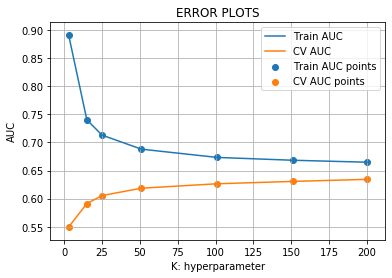

Wall time: 25min 28s


In [76]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101, 151, 201]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_1, y_train)

    y_train_pred = batch_predict(neigh, X_tr_1)    
    y_cv_pred = batch_predict(neigh, X_cr_1)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

###### K-NN Model With BOW Representation Using best Hyper-parameter(K)

In [87]:
best_k = 125

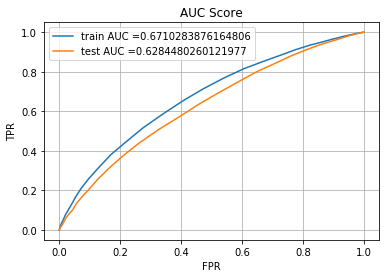

Wall time: 5min 18s


In [88]:
%%time
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_tr_1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_1)    
y_test_pred = batch_predict(neigh, X_te_1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC Score")
plt.grid()
plt.show()

In [89]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

###### Confusion Matrix

In [90]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.38785305737099457 for threshold 0.8
Train confusion matrix
[[ 4410  3016]
 [14436 27179]]
Test confusion matrix
[[ 2932  2527]
 [11015 19578]]


In [88]:
print(X_tr_1.shape, y_train.shape)
print(X_cr_1.shape, y_cv.shape)
print(X_te_1.shape, y_test.shape)

(49041, 101598) (49041,)
(24155, 101598) (24155,)
(36052, 101598) (36052,)


###### Top 2000 Features in BOW Representation

In [91]:
#Selecting Top 2000 Features 
from sklearn.feature_selection import SelectKBest, chi2
select_features = SelectKBest(chi2, k = 2000).fit(X_tr_1, y_train)
X_tr_2000 = select_features.transform(X_tr_1)
X_cr_2000 = select_features.transform(X_cr_1)
X_te_2000 = select_features.transform(X_te_1)
print(X_tr_2000.shape, y_train.shape)
print(X_cr_2000.shape, y_cv.shape)
print(X_te_2000.shape, y_test.shape)

(49041, 2000) (49041,)
(24155, 2000) (24155,)
(36052, 2000) (36052,)


###### Finding best Hyper-parameter(K) using simple Cross-Validation

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [17:02<00:00, 170.49s/it]


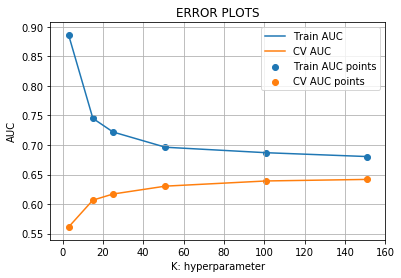

Wall time: 17min 6s
Compiler : 125 ms


In [96]:
%%time
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101, 151]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_2000, y_train)

    y_train_pred = batch_predict(neigh, X_tr_2000)    
    y_cv_pred = batch_predict(neigh, X_cr_2000)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

###### K-NN Model with BOW representation for Top 2000 Features using best Hyper-parameter(K)

In [94]:
new_k = 145

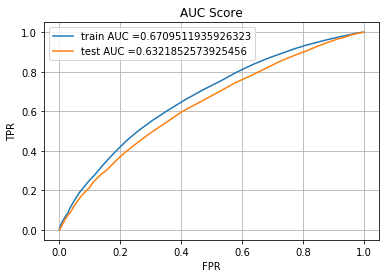

Wall time: 3min 39s


In [99]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=new_k, n_jobs=-1)
neigh.fit(X_tr_2000, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_2000)    
y_test_pred = batch_predict(neigh, X_te_2000)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC Score")
plt.grid()
plt.show()

###### Confusion Matrix

In [96]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.38924156285061995 for threshold 0.786
Train confusion matrix
[[ 4759  2667]
 [16339 25276]]
Test confusion matrix
[[ 3272  2187]
 [12364 18229]]


### 2.1.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

###### Finding best Hyper-parameter(K) using simple Cross-Validation

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [29:42<00:00, 254.67s/it]


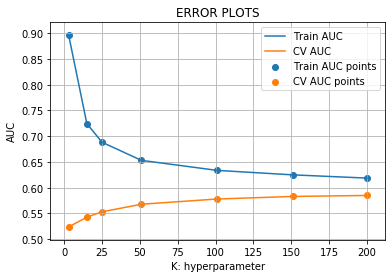

Wall time: 29min 42s


In [101]:
%%time
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101, 151, 201]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_2, y_train)

    y_train_pred = batch_predict(neigh, X_tr_2)    
    y_cv_pred = batch_predict(neigh, X_cr_2)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

###### K-NN Model with tf-idf representation using best Hyper-parameter(K)

In [97]:
optimal_k = 141

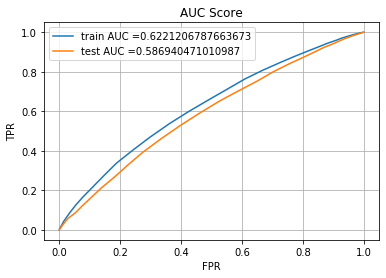

Wall time: 5min 15s


In [100]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
neigh.fit(X_tr_2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_2)    
y_test_pred = batch_predict(neigh, X_te_2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC Score")
plt.grid()
plt.show()

###### Confusion Matrix

In [101]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.34426672052067975 for threshold 0.851
Train confusion matrix
[[ 4266  3160]
 [16676 24939]]
Test confusion matrix
[[ 2949  2510]
 [12551 18042]]


In [102]:
print(X_tr_2.shape, y_train.shape)
print(X_cr_2.shape, y_cv.shape)
print(X_te_2.shape, y_test.shape)

(49041, 101413) (49041,)
(24155, 101413) (24155,)
(36052, 101413) (36052,)


###### Top 2000 features in tf-idf representation

In [103]:
#Selecting Top 2000 Features 
from sklearn.feature_selection import SelectKBest, chi2
select_features = SelectKBest(chi2, k = 2000).fit(X_tr_2, y_train)
X_tr_2000tf = select_features.transform(X_tr_2)
X_cr_2000tf = select_features.transform(X_cr_2)
X_te_2000tf = select_features.transform(X_te_2)
print(X_tr_2000tf.shape, y_train.shape)
print(X_cr_2000tf.shape, y_cv.shape)
print(X_te_2000tf.shape, y_test.shape)

(49041, 2000) (49041,)
(24155, 2000) (24155,)
(36052, 2000) (36052,)


###### Finding best Hyper-parameter(K) using simple Cross-Validation

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [19:02<00:00, 142.83s/it]


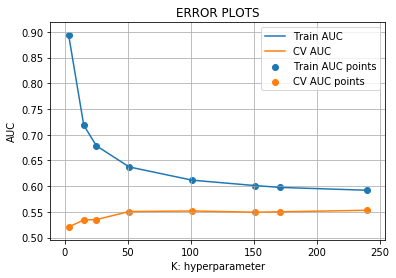

Wall time: 19min 2s


In [111]:
%%time
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101, 151, 171, 241]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_2000tf, y_train)

    y_train_pred = batch_predict(neigh, X_tr_2000tf)    
    y_cv_pred = batch_predict(neigh, X_cr_2000tf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

###### K-NN Model With tf-idf Representation for top 2000 Features using best Hyper-parameter(K)

In [105]:
tfidd_best_k = 175

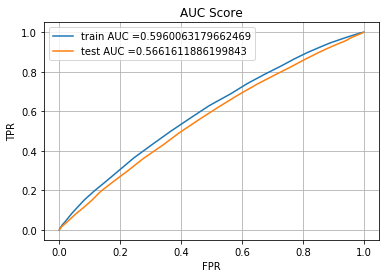

Wall time: 3min 7s


In [106]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

neigh = KNeighborsClassifier(n_neighbors=tfidd_best_k, n_jobs=-1)
neigh.fit(X_tr_2000tf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_2000tf)    
y_test_pred = batch_predict(neigh, X_te_2000tf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC Score")
plt.grid()
plt.show()

###### Confusion Matrix

In [107]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.322071245532718 for threshold 0.851
Train confusion matrix
[[ 4260  3166]
 [18251 23364]]
Test confusion matrix
[[ 2967  2492]
 [13601 16992]]


### 2.1.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

###### Finding best Hyper-parameter(K) using simple Cross-Validation

100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [4:32:32<00:00, 2336.05s/it]


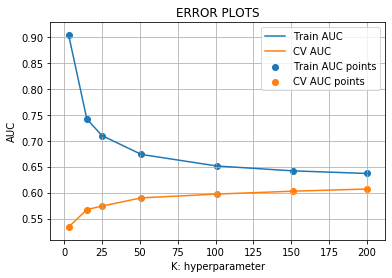

Wall time: 4h 32min 32s


In [120]:
%%time
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101, 151, 201]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_3, y_train)

    y_train_pred = batch_predict(neigh, X_tr_3)    
    y_cv_pred = batch_predict(neigh, X_cr_3)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

###### K-NN Model With (Avg W2V) Representation using best Hyper-parameter(K)

In [108]:
optimanl_k = 143

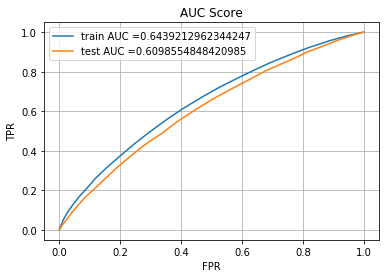

Wall time: 48min 19s


In [109]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=optimanl_k, n_jobs=-1)
neigh.fit(X_tr_3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_3)    
y_test_pred = batch_predict(neigh, X_te_3)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC Score")
plt.grid()
plt.show()

###### Confusion Matrix

In [123]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.358292200454068 for threshold 0.86
Train confusion matrix
[[ 4627  2799]
 [17685 23930]]
Test confusion matrix
[[ 3219  2240]
 [13178 17415]]


### 2.1.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

###### Finding best Hyper-parameter(K) using simple Cross-Validation

100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [4:47:42<00:00, 2466.13s/it]


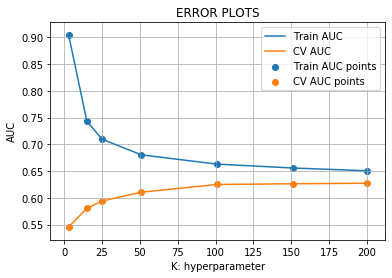

Wall time: 4h 47min 45s


In [78]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101, 151, 200]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_4, y_train)

    y_train_pred = batch_predict(neigh, X_tr_4)    
    y_cv_pred = batch_predict(neigh, X_cr_4)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

###### K-NN Model With (tf-idf  W2V)  Representation using best Hyper-parameter(K)

In [82]:
optimanl_k = 125

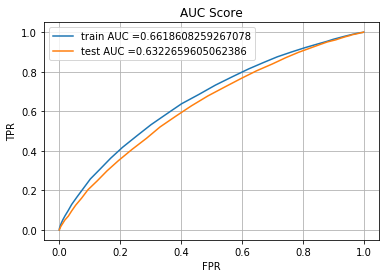

Wall time: 45min


In [110]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=optimanl_k, n_jobs=-1)
neigh.fit(X_tr_4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_4)    
y_test_pred = batch_predict(neigh, X_te_4)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC Score")
plt.grid()
plt.show()

###### Confusion Matrix

In [111]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.38182683343936835 for threshold 0.846
Train confusion matrix
[[ 4444  2982]
 [15063 26552]]
Test confusion matrix
[[ 3090  2369]
 [11394 19199]]


<h1>3. Conclusions</h1>

In [112]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
T = PrettyTable()
T.field_names = ["Vectorizor", "Model", "Hyperparameter", "AUC Score"]
T.add_row(["BOW", "K-nn Brute", 125, 0.63])
T.add_row(["tf-idf", "K-nn Brute", 141, 0.58])
T.add_row(["Avg-W2V","K-nn Brute", 143, 0.61])
T.add_row(["tf-idf W2V", "K-nn Brute", 125, 0.63])
print(T)

+------------+------------+----------------+-----------+
| Vectorizor |   Model    | Hyperparameter | AUC Score |
+------------+------------+----------------+-----------+
|    BOW     | K-nn Brute |      125       |    0.63   |
|   tf-idf   | K-nn Brute |      141       |    0.58   |
|  Avg-W2V   | K-nn Brute |      143       |    0.61   |
| tf-idf W2V | K-nn Brute |      125       |    0.63   |
+------------+------------+----------------+-----------+


###### With top 2000 Features

In [114]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
S = PrettyTable()
S.field_names = ["Vectorizor", "Model", "Hyperparameter", "AUC Score"]
S.add_row(["BOW", "K-nn Brute", 145, 0.63])
S.add_row(["tf-idf", "K-nn Brute", 175, 0.56])
print(S)

+------------+------------+----------------+-----------+
| Vectorizor |   Model    | Hyperparameter | AUC Score |
+------------+------------+----------------+-----------+
|    BOW     | K-nn Brute |      145       |    0.63   |
|   tf-idf   | K-nn Brute |      175       |    0.56   |
+------------+------------+----------------+-----------+
